In [1]:
import pandas as pd
df=pd.read_csv("../item_based/data_set/reviews.txt",sep="\t",names=["reviews","comments"])
df

,reviews,comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, ..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [2]:
# text preprocessing 

# normalizing the text 
df["comments"]=df["comments"].apply(lambda x:str(x).lower())

In [3]:
# remove spacial charecter
import re
df["comments"]=df["comments"].apply(lambda x:re.sub(r'[^A-Za-z\s]', '', x))

In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/intel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# tokenized 
df["comments"]=df["comments"].apply(lambda x:str(x).split(" "))


In [6]:
df

,reviews,comments
0,1,"[the, da, vinci, code, book, is, just, awesome]"
1,1,"[this, was, the, first, clive, cussler, ive, e..."
2,1,"[i, liked, the, da, vinci, code, a, lot]"
3,1,"[i, liked, the, da, vinci, code, a, lot]"
4,1,"[i, liked, the, da, vinci, code, but, it, ulti..."
...,...,...
6913,0,"[brokeback, mountain, was, boring]"
6914,0,"[so, brokeback, mountain, was, really, depress..."
6915,0,"[as, i, sit, here, watching, the, mtv, movie, ..."
6916,0,"[ok, brokeback, mountain, is, such, a, horribl..."


In [7]:
# removing the stop words 
df["comments"]=df["comments"].apply(lambda x:[i for i in x if i not in stopwords.words("english") ])

In [8]:
# using lametization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download("wordnet")


[nltk_data] Downloading package wordnet to /Users/intel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
lamitizer=WordNetLemmatizer()
df

,reviews,comments
0,1,"[da, vinci, code, book, awesome]"
1,1,"[first, clive, cussler, ive, ever, read, even,..."
2,1,"[liked, da, vinci, code, lot]"
3,1,"[liked, da, vinci, code, lot]"
4,1,"[liked, da, vinci, code, ultimatly, didnt, see..."
...,...,...
6913,0,"[brokeback, mountain, boring]"
6914,0,"[brokeback, mountain, really, depressing]"
6915,0,"[sit, watching, mtv, movie, awards, reminded, ..."
6916,0,"[ok, brokeback, mountain, horrible, movie]"


In [10]:
df["comments"]=df["comments"].apply(lambda x:[lamitizer.lemmatize(i,pos=wordnet.VERB) for i in x ])

In [11]:
df

,reviews,comments
0,1,"[da, vinci, code, book, awesome]"
1,1,"[first, clive, cussler, ive, ever, read, even,..."
2,1,"[like, da, vinci, code, lot]"
3,1,"[like, da, vinci, code, lot]"
4,1,"[like, da, vinci, code, ultimatly, didnt, seem..."
...,...,...
6913,0,"[brokeback, mountain, bore]"
6914,0,"[brokeback, mountain, really, depress]"
6915,0,"[sit, watch, mtv, movie, award, remind, much, ..."
6916,0,"[ok, brokeback, mountain, horrible, movie]"


In [12]:
# converting into features
from sklearn.feature_extraction.text import CountVectorizer
df["comments"]=df["comments"].apply(lambda x:" ".join(x))


In [13]:
import numpy as np

In [14]:
vectorize=CountVectorizer()
pre=pd.DataFrame(vectorize.fit_transform(df["comments"].to_list()).toarray(),columns=vectorize.get_feature_names_out())



In [15]:
df=(df.join(pre,how="outer")).drop(axis=1,columns="comments")

In [16]:
df

,reviews,aaron,able,abortion,abrams,absolute,absolutely,absurd,academy,acceptable,...,yip,you,youand,young,younger,youre,yuck,yuh,zach,zen
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:

from sklearn.model_selection import train_test_split
# input feature
X=df.drop(columns=["reviews"])
y=df["reviews"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [19]:
ypredicted=gnb.predict(x_test)
accuracy=accuracy_score(y_test,ypredicted)
accuracy

0.9552023121387283

In [21]:
# but after understand the problem  in classification data set like imbalance data set 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=y_test,y_pred=ypredicted)


<Axes: >

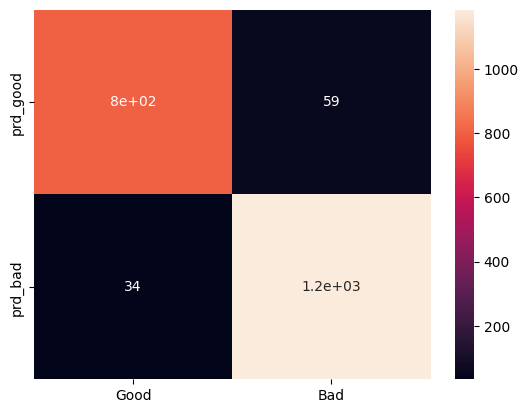

In [24]:
import seaborn
seaborn.heatmap(cm,annot=True,xticklabels=["Good","Bad"],yticklabels=["prd_good","prd_bad"])

In [26]:
df["reviews"].value_counts()

reviews
1    3943
0    2975
Name: count, dtype: int64

In [ ]:
# hance my data set is not imbalanced